In [8]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine, event
from sqlalchemy.pool import StaticPool
import matplotlib.pyplot as plt

In [2]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};Server=CorpPolDBAcc;Database=DW;UID=MarketRW;PWD=MRW;')
engine = create_engine("mssql+pyodbc://", poolclass=StaticPool, creator=lambda: conn)

df_tbl_pod = pd.read_sql("SELECT * FROM [DW].[pod].[tbl_POD]", engine)

In [3]:
df_tbl_pod

,IsTempRecord,Reporter,Country,State,Week,Year,Month,SiteLetter,SiteNumber,TreeNumber,...,Ripe,Wilt,Damaged,Healthy,Total,Cherelles,Adults,ImportDate,ID,ts
0,False,BRA,Brazil,Bahia,0,2012,3,C,1,1,...,0.0,NaN,1.0,18.0,19.0,9.0,9.0,2020-01-15 10:11:50.913,111651,b'\x00\x00\x00\x03\xea\r\xfe1'
1,False,BRA,Brazil,Bahia,0,2012,3,C,1,2,...,0.0,NaN,1.0,30.0,31.0,23.0,7.0,2020-01-15 10:11:50.913,111652,b'\x00\x00\x00\x03\xea\r\xfe2'
2,False,BRA,Brazil,Bahia,0,2012,3,C,1,3,...,0.0,NaN,1.0,7.0,8.0,7.0,0.0,2020-01-15 10:11:50.913,111653,b'\x00\x00\x00\x03\xea\r\xfe3'
3,False,BRA,Brazil,Bahia,0,2012,3,C,1,4,...,0.0,NaN,3.0,63.0,66.0,33.0,30.0,2020-01-15 10:11:50.913,111654,b'\x00\x00\x00\x03\xea\r\xfe4'
4,False,BRA,Brazil,Bahia,0,2012,3,C,1,5,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2020-01-15 10:11:50.913,111655,b'\x00\x00\x00\x03\xea\r\xfe5'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111539,False,IDN,Indonesia,Sumatra,0,2022,12,SM,11,0,...,0.0,0.0,0.0,7.0,8.0,4.0,3.0,2023-01-09 13:57:09.953,182020,"b""\x00\x00\x00'\xa8\n\xb8t"""
111540,False,IDN,Indonesia,Sumatra,0,2022,12,SM,12,0,...,10.0,0.0,2.0,65.0,74.0,42.0,23.0,2023-01-09 13:57:09.953,182021,"b""\x00\x00\x00'\xa8\n\xb8u"""
111541,False,IDN,Indonesia,Sumatra,0,2022,12,SM,15,0,...,1.0,0.0,0.0,94.0,96.0,53.0,41.0,2023-01-09 13:57:09.953,182024,"b""\x00\x00\x00'\xa8\n\xb8v"""
111542,False,IDN,Indonesia,Sumatra,0,2022,12,SM,24,0,...,1.0,0.0,0.0,38.0,40.0,25.0,13.0,2023-01-09 13:57:09.953,182023,"b""\x00\x00\x00'\xa8\n\xb8w"""


<AxesSubplot: >

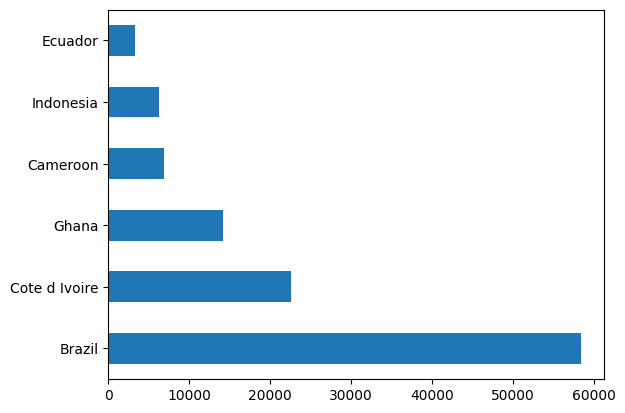

In [9]:
df_tbl_pod['Country'].value_counts().plot(kind='barh')

<AxesSubplot: >

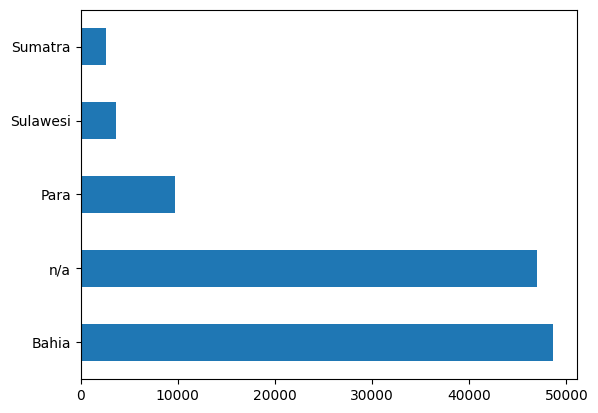

In [11]:
df_tbl_pod['State'].value_counts().plot(kind='barh')

In [6]:
df_tbl_pod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111544 entries, 0 to 111543
Data columns (total 45 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   IsTempRecord   111544 non-null  bool          
 1   Reporter       111544 non-null  object        
 2   Country        111544 non-null  object        
 3   State          111544 non-null  object        
 4   Week           111544 non-null  int64         
 5   Year           111544 non-null  int64         
 6   Month          111544 non-null  int64         
 7   SiteLetter     111544 non-null  object        
 8   SiteNumber     111544 non-null  int64         
 9   TreeNumber     111544 non-null  int64         
 10  PCSample       109218 non-null  object        
 11  Variety        111544 non-null  object        
 12  Moisture       85731 non-null   float64       
 13  Texture        107339 non-null  float64       
 14  Canopy         107402 non-null  float64       
 15  

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_tbl_pod.head())

,IsTempRecord,Reporter,Country,State,Week,Year,Month,SiteLetter,SiteNumber,TreeNumber,PCSample,Variety,Moisture,Texture,Canopy,Maintenance,Flowers,Leaf flushing,WB,Monilia T/S,Monilia M/L,Monilia M,Black Pod,Other D/D,Harvest,Drying,Fermentation,Fertilizer,Fungicide,Irrigation,Tiny,Small,Medium,Large,Mature,Ripe,Wilt,Damaged,Healthy,Total,Cherelles,Adults,ImportDate,ID,ts
0,False,BRA,Brazil,Bahia,0,2012,3,C,1,1,Y,n/a,NaN,4.0,3.0,2.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,False,None,None,False,False,None,4.0,5.0,7.0,1.0,1.0,0.0,NaN,1.0,18.0,19.0,9.0,9.0,2020-01-15 10:11:50.913,111651,b'\x00\x00\x00\x03\xea\r\xfe1'
1,False,BRA,Brazil,Bahia,0,2012,3,C,1,2,Y,n/a,NaN,4.0,3.0,2.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,False,None,None,False,False,None,8.0,15.0,7.0,0.0,0.0,0.0,NaN,1.0,30.0,31.0,23.0,7.0,2020-01-15 10:11:50.913,111652,b'\x00\x00\x00\x03\xea\r\xfe2'
2,False,BRA,Brazil,Bahia,0,2012,3,C,1,3,Y,n/a,NaN,4.0,3.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,False,None,None,False,False,None,5.0,2.0,0.0,0.0,0.0,0.0,NaN,1.0,7.0,8.0,7.0,0.0,2020-01-15 10:11:50.913,111653,b'\x00\x00\x00\x03\xea\r\xfe3'
3,False,BRA,Brazil,Bahia,0,2012,3,C,1,4,Y,n/a,NaN,4.0,4.0,2.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,False,None,None,False,False,None,18.0,15.0,25.0,4.0,1.0,0.0,NaN,3.0,63.0,66.0,33.0,30.0,2020-01-15 10:11:50.913,111654,b'\x00\x00\x00\x03\xea\r\xfe4'
4,False,BRA,Brazil,Bahia,0,2012,3,C,1,5,Y,n/a,NaN,4.0,2.0,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,False,None,None,False,False,None,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2020-01-15 10:11:50.913,111655,b'\x00\x00\x00\x03\xea\r\xfe5'


In [15]:
df_noaa_tbl_StationData = pd.read_sql("SELECT TOP (1000) * FROM [DW].[noaa].[tbl_StationData]", engine)

In [17]:
df_noaa_tbl_StationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   USAF                  1000 non-null   object        
 1   WBAN                  1000 non-null   object        
 2   YEAR                  1000 non-null   int64         
 3   MONTH                 1000 non-null   int64         
 4   DAY                   1000 non-null   int64         
 5   TEMP                  1000 non-null   float64       
 6   TEMP_Count            1000 non-null   int64         
 7   DEWP                  990 non-null    float64       
 8   DEWP_Count            1000 non-null   int64         
 9   SLP                   1000 non-null   float64       
 10  SLP_Count             1000 non-null   int64         
 11  STP                   0 non-null      object        
 12  STP_Count             1000 non-null   int64         
 13  VISIB              

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_noaa_tbl_StationData.head())

,USAF,WBAN,YEAR,MONTH,DAY,TEMP,TEMP_Count,DEWP,DEWP_Count,SLP,SLP_Count,STP,STP_Count,VISIB,VISIB_Count,WDSP,WDSP_Count,MXSPD,GUST,MAX,MAX_Flag,MIN,MIN_Flag,PRCP,PRCP_Flag,SNDP,Fog,RainOrDrizzle,SnowOrIcePellets,Hail,Thunder,TornadoOrFunnelCloud,ID,EntryDate,ts
0,030020,99999,2000,1,1,44.1,24,39.3,24,1005.9,24,None,0,8.5,24,17.1,24,27.0,35.9,45.9,,41.7,*,0.24,F,None,False,False,False,False,False,False,544454631,2021-01-07 11:29:56.287,b'\x00\x00\x00\rG\x0e7\x01'
1,030020,99999,2000,1,2,41.5,24,35.1,24,1003.8,23,None,0,12.5,23,21.4,24,37.9,52.1,45.3,*,37.0,*,0.06,F,None,False,False,False,False,False,False,544454632,2021-01-07 11:29:56.287,b'\x00\x00\x00\rG\x0e7\x02'
2,030020,99999,2000,1,3,43.4,24,39.0,24,985.1,24,None,0,7.7,15,35.5,24,52.8,74.0,46.4,*,36.9,,0.20,F,None,False,False,False,False,False,False,544454633,2021-01-07 11:29:56.287,b'\x00\x00\x00\rG\x0e7\x03'
3,030020,99999,2000,1,4,39.3,22,36.8,22,994.0,22,None,0,14.8,19,14.6,22,23.9,NaN,44.1,,34.9,*,0.02,E,None,False,False,False,False,False,False,544454634,2021-01-07 11:29:56.287,b'\x00\x00\x00\rG\x0e7\x04'
4,030020,99999,2000,1,5,41.9,21,40.1,20,988.3,21,None,0,10.4,21,20.4,21,28.9,36.9,47.7,*,36.0,,0.00,C,None,False,False,False,False,False,False,544454635,2021-01-07 11:29:56.287,b'\x00\x00\x00\rG\x0e7\x05'
